In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
plt.style.use('bmh')

In [2]:
#!pip install tensorflow
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import numpy.random as npr
%matplotlib inline
plt.style.use('bmh')

import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix


In [4]:
from tensorflow import keras

In [5]:
# Loading Data
data_train = np.load('data_train.npy')
labels_train = np.load('labels_train.npy')

labels_names =['Stadium','Building','Traffic Sign','Forest','Flowers',
              'Street','Classroom','Bridge','Statue','Lake']

print(data_train.shape, labels_train.shape)

(270000, 3124) (3124,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_train.transpose(), labels_train, test_size=0.20)


In [7]:
X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train = np.resize(X_train,(2499,300,300,3))
X_test = np.resize(X_test,(625,300,300,3))
y_train_new = y_train - 1
y_test_new = y_test - 1
print(y_train_new)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_new))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_new))

(2499, 270000)
(625, 270000)
(2499,)
(625,)
[9. 7. 3. ... 8. 8. 4.]


In [8]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [9]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [10]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(300,
                                  300,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

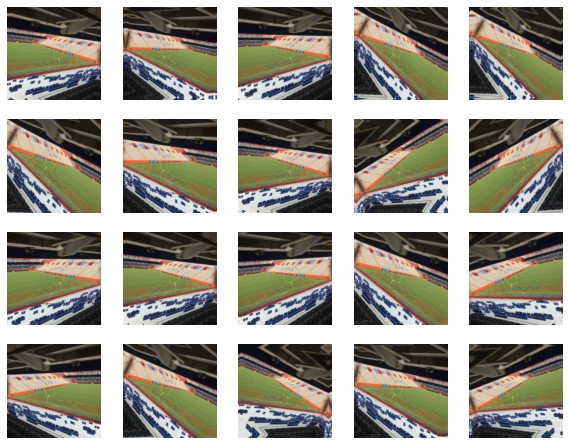

In [11]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(20):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [13]:
num_classes = 10

model_aug = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])



In [14]:
model_aug.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
epochs=60
history = model_aug.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=epochs
)

Epoch 1/60
26/40 [==================>...........] - ETA: 37s - loss: 2.4734 - accuracy: 0.1354

KeyboardInterrupt: 

In [ ]:
# this gives the prediction confidence
predictions = model_aug.predict(X_test)
score = tf.nn.softmax(predictions[0])

In [ ]:
scores_cnn = tf.nn.softmax(predictions)

In [ ]:
scores_cnn_np = np.array(scores_cnn)

In [ ]:
final_scores = scores_cnn_np
num_pred = final_scores.shape[0]
final_predictions = np.zeros(num_pred)
#final_scores.shape
for i in range(num_pred):
    index = np.where(final_scores[i,:] == np.amax(final_scores[i,:]))
    #print(index)
    final_predictions[i] = index[0] + 1
    
#final_predictions

conf_matrix_boost = confusion_matrix(y_test, final_predictions)
class_report_boost = classification_report(y_test, final_predictions)
print(conf_matrix_boost)
print(class_report_boost)

In [ ]:
final_scores[0,:]

In [ ]:
model_aug.save_weights('./checkpoints/my_checkpoint')

In [ ]:
num_classes = 10

model_new = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

model_new.load_weights('./checkpoints/my_checkpoint')

predictions = model_new.predict(X_test)

scores_cnn = tf.nn.softmax(predictions)
scores_cnn_np = np.array(scores_cnn)

final_scores = (0.66 / (0.66 + 0.27 + 0.33)) * scores_cnn_np + 0*(0.27 / (0.66 + 0.27 + 0.33)) * y_pred_gnb_proba + 0*(0.33 / (0.66 + 0.27 + 0.33)) * y_pred_gnb_edge_proba
final_scores = scores_cnn_np
num_pred = final_scores.shape[0]
final_predictions = np.zeros(num_pred)
#final_scores.shape
for i in range(num_pred):
    index = np.where(final_scores[i,:] == np.amax(final_scores[i,:]))
    #print(index)
    final_predictions[i] = index[0] + 1
    
#final_predictions

conf_matrix_boost = confusion_matrix(y_test, final_predictions)
class_report_boost = classification_report(y_test, final_predictions)
print(conf_matrix_boost)
print(class_report_boost)

In [ ]:
predictions

In [ ]:
y_test_hist

In [ ]:
##### Histogram as features
#Obtain the Histogram Features for all Samples
features = []
for i in range(data_train.shape[1]):
    image = data_train[:,i].reshape((300,300,3))
    f_hist=[]
    for j in range(3):
        channel = image[:,:,j]
        hist = cv2.calcHist([channel], [0], None, [32], [0, 256])
        if j ==0:
            f_hist=hist
        else:
            f_hist=np.vstack((f_hist,hist))
    if i==0:
        features = f_hist
    else:
        features = np.hstack((features, f_hist))
features = features.T
print(features.shape)

In [ ]:
X_train_hist, X_test_hist, y_train_hist, y_test_hist = train_test_split(features, labels_train, test_size = 0.20)

scaler = StandardScaler()
scaler.fit(X_train_hist)

X_train_scaled = scaler.transform(X_train_hist)
X_test_scaled = scaler.transform(X_test_hist)

gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train_scaled, y_train_hist).predict(X_test_scaled)
y_pred_gnb

In [ ]:
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
class_report_gnb = classification_report(y_test, y_pred_gnb)
print(conf_matrix_gnb)
print(class_report_gnb)